# Partie 3 - Modele predictif 4 : XGBOOST

## Presentation du modele

XGBoost (eXtreme Gradient Boosting) est un algorithme d'apprentissage supervisé, utilisé pour la classification et la régression. Contrairement à Random Forest, qui construit des arbres indépendants, XGBoost utilise une technique appelée boosting : il entraîne séquentiellement des arbres de décision, où chaque nouvel arbre corrige les erreurs des précédents. Il optimise une fonction de coût en utilisant le gradient (d'où son nom) et intègre des techniques avancées comme la régularisation pour éviter le surajustement (overfitting). XGBoost est connu pour sa rapidité, sa précision et sa capacité à gérer de grands volumes de données, ce qui en fait un outil populaire dans les compétitions de machine learning et les applications industrielles.

# XGBOOST

## Importation des bibliotheques et du dataset


In [55]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('heart_disease_by_ceo.csv', index_col=0)

## Division des données

On va ensuite divise notre data frame en deux ensembles afin d'entrainer notre modele.

D'abord assigner toutes les valeurs sauf Heart diseases dans x et Heart diseases dans y.

In [56]:
from sklearn.model_selection import train_test_split
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

### Sous-partie : Verification des types

Dans le cas du XGBoost, il est necessaire de convertir les variables categorielles en variables numeriques afin de pouvoir les utiliser dans le modele. Dans notre cas, lors du nettoyage de notre dataset, nous avons converti les variables categorielles en variables numeriques. Nous n'avons donc pas besoin de le faire ici.

In [57]:
X.dtypes

Age                    int64
Sex                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
ExerciseAngina         int64
Oldpeak              float64
TA_ChestPain           int64
ATA_ChestPain          int64
NAP_ChestPain          int64
ASY_ChestPain          int64
Normal_RestingECG      int64
ST_RestingECG          int64
LVH_RestingECG         int64
Up_ST_Slope            int64
Flat_ST_Slope          int64
Down_ST_Slope          int64
dtype: object

## Division des données (Suite)

Puis je vais diviser mes données de la manière suivante : 

80% pour l'entrainement et 20% pour le test.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


On va ensuite importer la librairie XGBoost et creer un modele XGBoost.

On utilise "xgb.DMatrix" pour convertir les données en un format utilisable et optimisé par XGBoost.

In [59]:
import xgboost as xgb
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)


## XGBoost Regression

## Entrainement du modele

On va ensuite passé à l'entrainement de notre modele. On utilise "xgb.train" pour entrainer notre modele avec des parametres specifiques.

les parametres correspondent à : 

param : les parametres du modele
"objective" : "reg:squarederror" pour une regression
"tree_method": "hist" qui est une methode d'entrainement plus rapide
n : le nombre d'iterations


In [60]:
params = {"objective": "reg:squarederror", "tree_method": "hist"}

n = 100
model = xgb.train(params=params, dtrain=dtrain_reg, num_boost_round=n)



In [61]:
from sklearn.metrics import mean_squared_error

preds = model.predict(dtest_reg)


On va ensuite calculer l'erreur quadratique moyenne pour evaluer notre modele. Plus il est bas plus notre modele est bon.

In [62]:
rmse = mean_squared_error(y_test, preds, squared=False)
print(f"RMSE: {rmse:.3f}")


RMSE: 0.344


On rajoute ensuite le parametre "eval_metric : logloss" qui est une metrique permettant une meilleure resolution des problemes de classification binaire. Il mesure l'erreur entre les probabilités prédites et les valeurs reelles.

En gros il ameliore la precision de notre modele et penalise les erreurs de classification.

In [63]:
params = {"objective": "binary:logistic", "tree_method": "hist", "eval_metric": "logloss"}
n = 100
evals = [(dtrain_reg, "train"), (dtest_reg, "test")]
model = xgb.train(params=params, dtrain=dtrain_reg, num_boost_round=n, evals=evals)


[0]	train-logloss:0.52785	test-logloss:0.55410
[1]	train-logloss:0.43180	test-logloss:0.47731
[2]	train-logloss:0.36709	test-logloss:0.42603
[3]	train-logloss:0.32072	test-logloss:0.39428
[4]	train-logloss:0.28087	test-logloss:0.37323
[5]	train-logloss:0.25258	test-logloss:0.35497
[6]	train-logloss:0.22769	test-logloss:0.33700
[7]	train-logloss:0.20708	test-logloss:0.32859
[8]	train-logloss:0.19094	test-logloss:0.32649
[9]	train-logloss:0.17758	test-logloss:0.31876
[10]	train-logloss:0.16452	test-logloss:0.31715
[11]	train-logloss:0.15201	test-logloss:0.31259
[12]	train-logloss:0.14088	test-logloss:0.31643
[13]	train-logloss:0.13295	test-logloss:0.30930
[14]	train-logloss:0.12606	test-logloss:0.30419
[15]	train-logloss:0.11957	test-logloss:0.30801
[16]	train-logloss:0.11438	test-logloss:0.30991
[17]	train-logloss:0.10877	test-logloss:0.30770
[18]	train-logloss:0.10448	test-logloss:0.30756
[19]	train-logloss:0.09708	test-logloss:0.30411
[20]	train-logloss:0.09187	test-logloss:0.30021
[2

## Optimisation du modele

In [ ]:
# Paramètres à optimiser
param_test = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

results = {}

for max_depth in param_test['max_depth']:
    for lr in param_test['learning_rate']:
        key = f"depth={max_depth}, lr={lr}"
        params = {
            "objective": "binary:logistic",
            "tree_method": "hist",
            "eval_metric": "logloss",
            "max_depth": max_depth,
            "learning_rate": lr
        }
        
        # Entraîner avec évaluation
        evals = [(dtrain_reg, "train"), (dtest_reg, "test")]
        evals_result = {}
        
        model = xgb.train(
            params=params,
            dtrain=dtrain_reg,
            num_boost_round=100,
            evals=evals,
            evals_result=evals_result
        )
        
        results[key] = evals_result['test']['logloss'][-1]

# Trouver la meilleure combinaison
best_config = min(results, key=results.get)
print(f"Meilleure configuration: {best_config}, score: {results[best_config]}")

[0]	train-logloss:0.68460	test-logloss:0.67411
[1]	train-logloss:0.67919	test-logloss:0.66906
[2]	train-logloss:0.67389	test-logloss:0.66411
[3]	train-logloss:0.66869	test-logloss:0.65925
[4]	train-logloss:0.66359	test-logloss:0.65449
[5]	train-logloss:0.65859	test-logloss:0.64982
[6]	train-logloss:0.65368	test-logloss:0.64523
[7]	train-logloss:0.64886	test-logloss:0.64073
[8]	train-logloss:0.64413	test-logloss:0.63631
[9]	train-logloss:0.63949	test-logloss:0.63198
[10]	train-logloss:0.63493	test-logloss:0.62772
[11]	train-logloss:0.63045	test-logloss:0.62354
[12]	train-logloss:0.62606	test-logloss:0.61943
[13]	train-logloss:0.62174	test-logloss:0.61540
[14]	train-logloss:0.61750	test-logloss:0.61144
[15]	train-logloss:0.61334	test-logloss:0.60755
[16]	train-logloss:0.60925	test-logloss:0.60373
[17]	train-logloss:0.60523	test-logloss:0.60005
[18]	train-logloss:0.60128	test-logloss:0.59636
[19]	train-logloss:0.59739	test-logloss:0.59281
[20]	train-logloss:0.59357	test-logloss:0.58925
[2

## Prediction finale

On va ensuite faire une prediction sur notre ensemble de test et afficher les resultats, donc l'exactitude et la precision de notre modele et ressortir une matrice de confusion.

Métriques de performance :
Accuracy: 0.8967
F1-score: 0.9156

Matrice de confusion :
[[ 62  10]
 [  9 103]]

Rapport de classification détaillé :
              precision    recall  f1-score   support

           0       0.87      0.86      0.87        72
           1       0.91      0.92      0.92       112

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



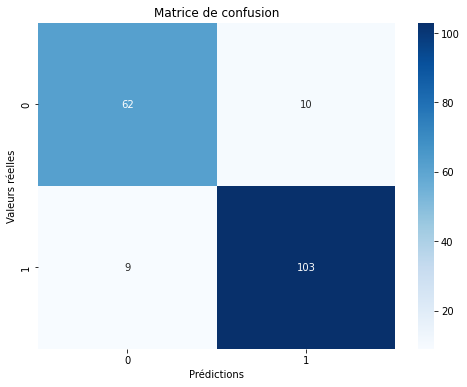

In [ ]:

y_pred = model.predict(dtest_reg)
y_pred_binary = (y_pred > 0.5).astype(int) 

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

conf_matrix = confusion_matrix(y_test, y_pred_binary)

print("Métriques de performance :")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nMatrice de confusion :")
print(conf_matrix)
print("\nRapport de classification détaillé :")
print(classification_report(y_test, y_pred_binary))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.ylabel('Valeurs réelles')
plt.xlabel('Prédictions')
plt.show()

## Analyse de l'importance des variables

On va ensuite afficher l'importance des variables de notre modele.

Importance des caractéristiques:
              Feature  Importance
15        Up_ST_Slope   24.154831
11      ASY_ChestPain    3.694047
6      ExerciseAngina    1.375764
1                 Sex    1.348889
4           FastingBS    0.898022
7             Oldpeak    0.840964
13      ST_RestingECG    0.755374
16      Flat_ST_Slope    0.684555
9       ATA_ChestPain    0.660403
5               MaxHR    0.614203
2           RestingBP    0.576437
10      NAP_ChestPain    0.506001
8        TA_ChestPain    0.505231
0                 Age    0.487639
3         Cholesterol    0.468177
12  Normal_RestingECG    0.448397
14     LVH_RestingECG    0.421529
17      Down_ST_Slope    0.419372


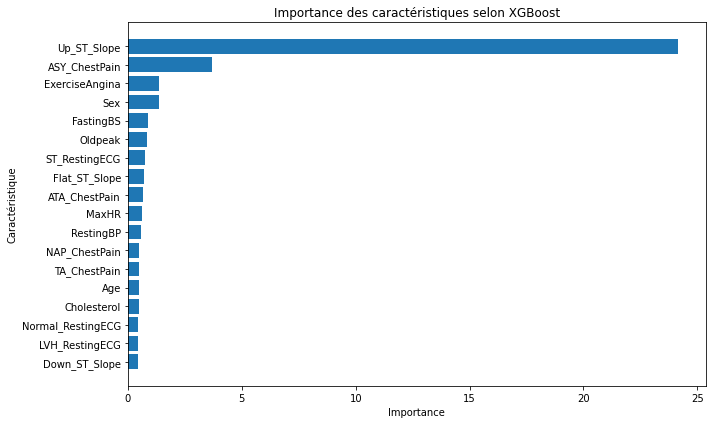

In [66]:
# Analyse de l'importance des variables
importance_type = 'gain'
# Supprimez .get_booster() car model est déjà un Booster
importances = model.get_score(importance_type=importance_type)
feature_importance_df = pd.DataFrame({
    'Feature': list(importances.keys()),
    'Importance': list(importances.values())
}).sort_values('Importance', ascending=False)

# Afficher le DataFrame des importances
print("Importance des caractéristiques:")
print(feature_importance_df)


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Caractéristique')
plt.title('Importance des caractéristiques selon XGBoost')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

On remarqe que dans le cas de XGBoost, on a une grosse importance de la variable Up_ST_Slope  suivis de ASY_ChestPain.

## Test 

### Fonction de test

On va ensuite utiliser des fonction de test afin de "tester" notre modele. Les fonctions sont les suivantes :

In [67]:
def tester_patient(Liste_donnees):
    df = pd.DataFrame(Liste_donnees, columns=X.columns)
    dtest = xgb.DMatrix(df)
    prediction_proba = model.predict(dtest)
    prediction = (prediction_proba > 0.5).astype(int)

    print(f"Probabilité de maladie cardiaque : {prediction_proba[0]:.4f}")
    print(f"Prédiction : {'Malade' if prediction[0] == 1 else 'Non Malade'}")
    
    return prediction_proba[0], prediction[0]
    
def tester_plusieurs_patient(Liste):
    for p in Liste:
        tester_patient(p)
        print("\n")

### Tests Unitaires

On va ensuite tester notre modele avec des tests unitaires. On va tester la fonction de test avec des valeurs connues et verifier si les resultats sont corrects.

In [68]:

patient = [[40,0,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1,0,0]] #0
patient2 = [[57,1,130,236,0,174,0,0.0,0,1,0,0,0,0,1,0,1,0]] #916
patient3 = [[57,0,130,131,0,115,1,1.2,0,0,0,1,1,0,0,0,1,0]] #915
patient4 = [[59,0,164,176,1,90,0,1.0,0,0,0,1,0,0,1,0,1,0]] #911
patient5 = [[49,1,160,180,0,156,0,1.0,0,0,1,0,1,0,0,0,1,0]] #1

liste_patients = [patient, patient2, patient3, patient4, patient5]
tester_plusieurs_patient(liste_patients)



Probabilité de maladie cardiaque : 0.0011
Prédiction : Non Malade


Probabilité de maladie cardiaque : 0.9323
Prédiction : Malade


Probabilité de maladie cardiaque : 0.9728
Prédiction : Malade


Probabilité de maladie cardiaque : 0.9977
Prédiction : Malade


Probabilité de maladie cardiaque : 0.9004
Prédiction : Malade




# Conclusion et Note

## Note 

- Perfomance : 
    - Precision :87 % pour les nons malades et 91 % pour les malades.
    - Accuracy (Exactitude) : 90 %
    - Recall : 86% pour les non malades et 92 % pour les malades.
    - F1 Score : 87 % pour les non malades et 92 % pour les malades.
    - Capacite a reconnaitre les faux positifs et les faux negatifs : Il a reussi tous les tests et a reconnu quand un patient etait malade ou non malade.

Les resutats sont tres encourageants et montrent que le modele est capable dans la majorité des cas de reconnaitre la presence ou non de maladies cardiaques. Il rejoint le modele Random Forest dans le cas ou le modele est tres performant et je donne une note de 2/2 pour ce modele.

- Robustesse : Le modele est robuste et a reussi tout les tests.Il est tres resistant au données aberrantes et redssort des resulats coherents, je donne une note de 1/1 pour ce modele.

- Complexité et Rapidité  : Le modele est intuitif. Malheureusement il necessite beacoup plus de puissance de calcul que les autres modeles et est donc plus long a entrainer. Il est cependant tres rapide lors de la prediction. Je donne une note de 0,75/1 pour ce modele.

- Interpretabilité et Explicabilité : Le modele est difficilement intepretable sans outils specifique mais avec ses derniers il devient assez simple. Il reste egalement difficile a expliquer et a comprendre. Je donne une note de 0,75/1 pour ce modele.

- Note Finale : 4,5/2

## Avantages

Sans aucun doute, XGBoost est le modele le plus performant testé jusqu'à maintenant, il repond a toute les attentes et ressort des resultats à la fois cohérent et fiable. Il a une excellent robustesse, une validation des croisées très convainquante et des resulats constants. 

## Inconvénients

Comme je l'ai dit XGBoost est le modele le plus performant mais dans notre cas on a des résultats très proche de random Forest parce que nous ne pouvons pas l'utiliser dans les meilleurs conditions possibles et avec la puissance de calcul nécessaire. On remarque alors qu'il est tres couteux energetiquement mais aussi que se manque de puissance le rends assez lent pour l'execution et l'entrainement. On peut egalement ajouter que comme pour Random Forest, il est difficilement interpretable et explicable sans outils specifiques comme SHAP.